In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [7]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# 1. Understand the dataset:
`1.Identify the shape of the dataset.`

`2.Identify variables with null values.`

**1.Identify the shape of the dataset.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [5]:
df.shape

(364558, 53)

**2.Identify variables with null values**

In [13]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

# 2. Perform basic data exploratory analysis:
`1.Utilize missing value treatment.`

`2.Analyze the date column and remove the entries if it has an incorrect timeline.`

`3.Draw a frequency plot for city-wise complaints.`

`4.Draw scatter and hexbin plots for complaint concentration across Brooklyn.`

**1.Utilize missing value treatment.**

In [14]:
df = df.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location',
              'Garage Lot Name','Ferry Direction','Ferry Terminal Name','Bridge Highway Name','Bridge Highway Direction',
              'Road Ramp','Bridge Highway Segment','Intersection Street 1','Intersection Street 2','Landmark'], axis=1)

In [45]:
df.shape

(306173, 40)

In [16]:
df[['School Zip','School Code','School Region']] = df[['School Zip','School Code','School Region']].fillna(method='pad')

In [17]:
df[['Location']] = df[['Location']].fillna(method='pad')

In [18]:
df[['Latitude']] = df[['Latitude']].fillna(df['Latitude'].mean())

In [19]:
df[['Longitude']] = df[['Longitude']].fillna(df['Longitude'].mean())

In [20]:
df[['X Coordinate (State Plane)']] = df[['X Coordinate (State Plane)']].fillna(df['X Coordinate (State Plane)'].mean())

In [21]:
df[['Y Coordinate (State Plane)']] = df[['Y Coordinate (State Plane)']].fillna(df['Y Coordinate (State Plane)'].mean())

In [22]:
df = df.drop(list(df['Cross Street 2'][df['Cross Street 2'].isna()].keys()),axis = 0) 

In [23]:
df = df.drop(list(df['Cross Street 1'][df['Cross Street 1'].isna()].keys()),axis = 0) 

In [24]:
df = df.drop(list(df['Closed Date'][df['Closed Date'].isna()].keys()),axis = 0) 

In [25]:
df = df.drop(list(df['Resolution Action Updated Date'][df['Resolution Action Updated Date'].isna()].keys()),axis = 0) 

In [26]:
# df[['Descriptor']] = df[['Descriptor']].fillna(value=df['Descriptor'].mode())
df[['Descriptor']] = df[['Descriptor']].fillna(value='No Access')

In [27]:
df[['Incident Zip']] = df[['Incident Zip']].fillna(df['Incident Zip'].mean())

In [28]:
df = df.drop(list(df['Location Type'][df['Location Type'].isna()].keys()),axis = 0) 

In [29]:
df = df.drop(list(df['Street Name'][df['Street Name'].isna()].keys()),axis = 0) 

In [30]:
df[['Facility Type']] = df[['Facility Type']].fillna(method='pad')

#### 2.Analyze the date column and remove the entries if it has an incorrect timeline.

In [36]:
# Converting the data into datetime format
df["Created Date"]=pd.to_datetime(df["Created Date"])
df["Closed Date"]=pd.to_datetime(df["Closed Date"])

In [38]:
df["Request_Closing_Time"]=(df["Closed Date"] - df["Created Date"])
df.Request_Closing_Time

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Request_Closing_Time, Length: 306173, dtype: timedelta64[ns]

In [44]:
Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df["Request_Closing_Time"]=Request_Closing_Time
df['Request_Closing_Time']

0          55.500000
1          87.216667
2         291.566667
3         465.450000
4         207.733333
             ...    
364553    617.783333
364554    140.566667
364555     19.050000
364556    160.883333
364557    167.000000
Name: Request_Closing_Time, Length: 306173, dtype: float64

In [50]:
df[df['Request_Closing_Time'] < 0]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time


**Observation :** `So date column has no incorrect timeline.`

**3.Draw a frequency plot for city-wise complaints.**

In [51]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.500000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",87.216667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.566667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.450000
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.733333


<AxesSubplot:>

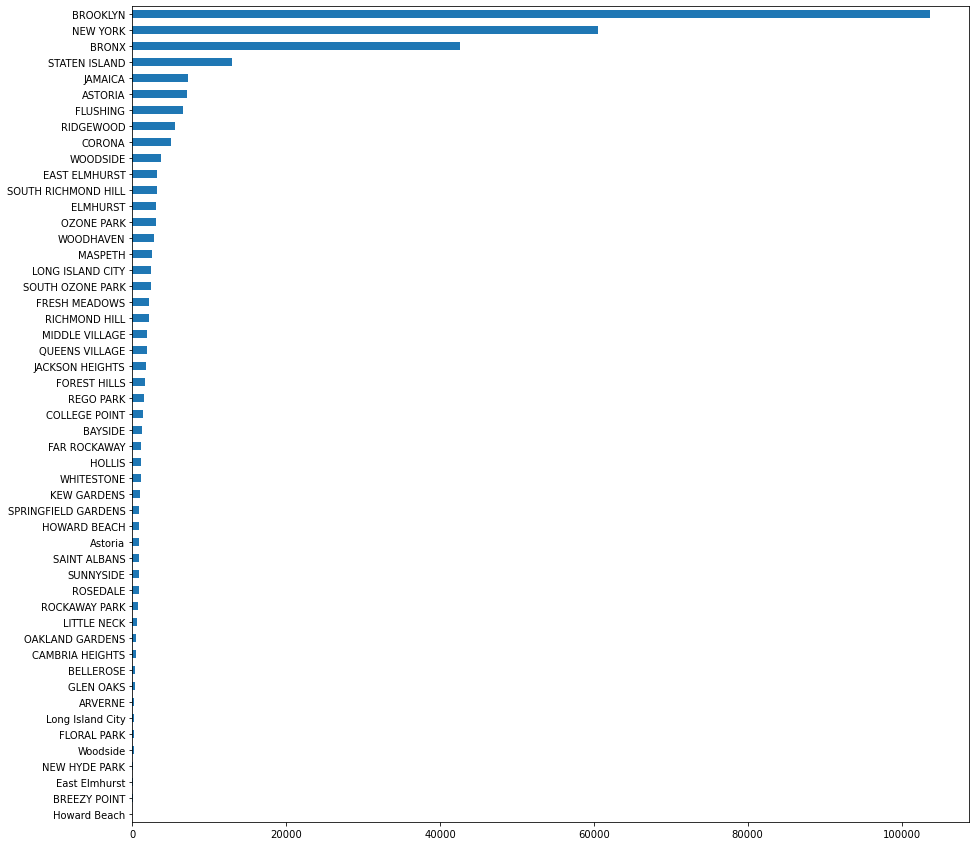

In [52]:
df['City'].value_counts(ascending=True).plot(kind='barh',figsize=(15,15))

**4.Draw scatter and hexbin plots for complaint concentration across Brooklyn.**

In [53]:
df_Brooklyn=df[df['City']=='BROOKLYN']

In [54]:
df_Brooklyn.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

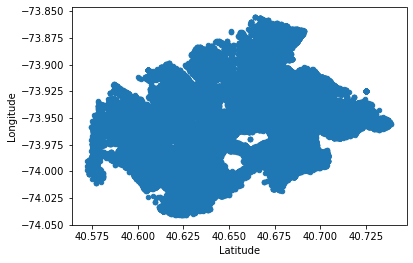

In [55]:
df_Brooklyn.plot.scatter('Latitude','Longitude')

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

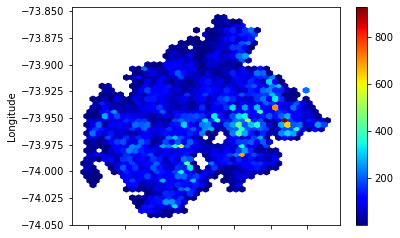

In [56]:
df_Brooklyn.plot.hexbin('Latitude','Longitude',colormap='jet',gridsize=40,mincnt=1)

# 3. Find major types of complaints:

**1.Plot a bar graph of count vs. complaint types**

<AxesSubplot:>

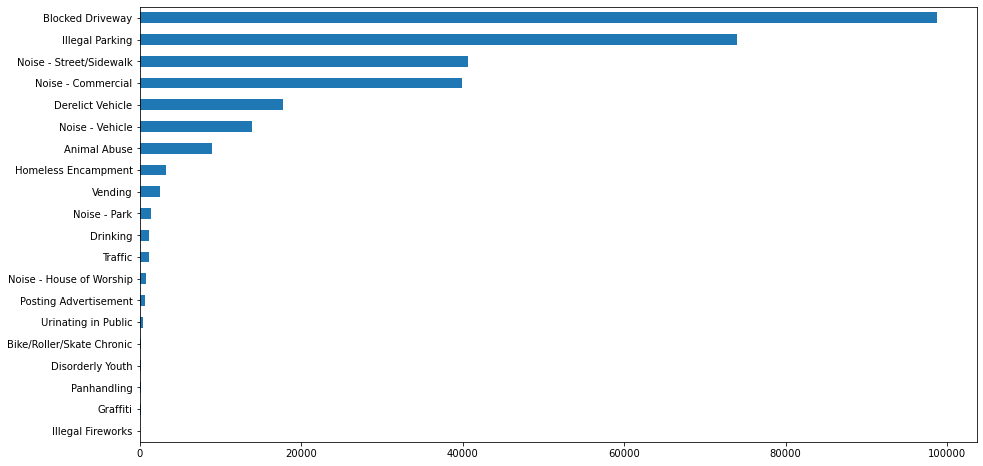

In [62]:
df['Complaint Type'].value_counts(ascending = True).plot(kind='barh',figsize=(15,8))

**2.Find the top 10 types of complaints**

In [63]:
df['Complaint Type'].value_counts().head(10)

Blocked Driveway           98714
Illegal Parking            74031
Noise - Street/Sidewalk    40685
Noise - Commercial         39963
Derelict Vehicle           17734
Noise - Vehicle            13930
Animal Abuse                8995
Homeless Encampment         3307
Vending                     2471
Noise - Park                1376
Name: Complaint Type, dtype: int64

**3. Display the types of complaints in each city in a separate dataset**

In [65]:
df['Complaint_count']= df['Complaint Type']

In [66]:
df_Complaint=df[['City','Complaint Type','Complaint_count']].groupby(['City','Complaint Type']).count()
df_Complaint

Complaint_count
City     Complaint Type                          
ARVERNE  Animal Abuse                          45
         Blocked Driveway                      49
         Derelict Vehicle                      25
         Disorderly Youth                       1
         Graffiti                               1
...                                           ...
Woodside Blocked Driveway                      27
         Derelict Vehicle                       8
         Illegal Parking                      124
         Noise - Commercial                     2
         Noise - Street/Sidewalk                5

[707 rows x 1 columns]

## 4. Visualize the major types of complaints in each city



In [67]:
df_new= pd.DataFrame()
for i in df['City'].unique():
    df_new[i]= df.loc[df['City']== i]['Complaint Type'].value_counts()
df_new.head()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,WHITESTONE,ARVERNE,FLORAL PARK,NEW HYDE PARK,BREEZY POINT,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,17709,300.0,7610,182,11238,9.0,133.0,26.0,41.0,52.0,...,20.0,18.0,3.0,NaN,1.0,144.0,28.0,5.0,NaN,NaN
Noise - Commercial,17214,1491.0,2614,72,12776,198.0,597.0,11.0,70.0,29.0,...,14.0,2.0,2.0,4.0,4.0,310.0,19.0,2.0,NaN,NaN
Illegal Parking,11416,1099.0,7899,661,28380,228.0,185.0,838.0,502.0,139.0,...,485.0,47.0,63.0,15.0,14.0,277.0,64.0,124.0,28.0,NaN
Noise - Vehicle,4257,148.0,2690,55,4523,13.0,55.0,33.0,34.0,37.0,...,15.0,7.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
Blocked Driveway,2543,3372.0,16799,1964,35905,421.0,688.0,655.0,760.0,306.0,...,276.0,49.0,33.0,74.0,3.0,159.0,55.0,27.0,NaN,1.0


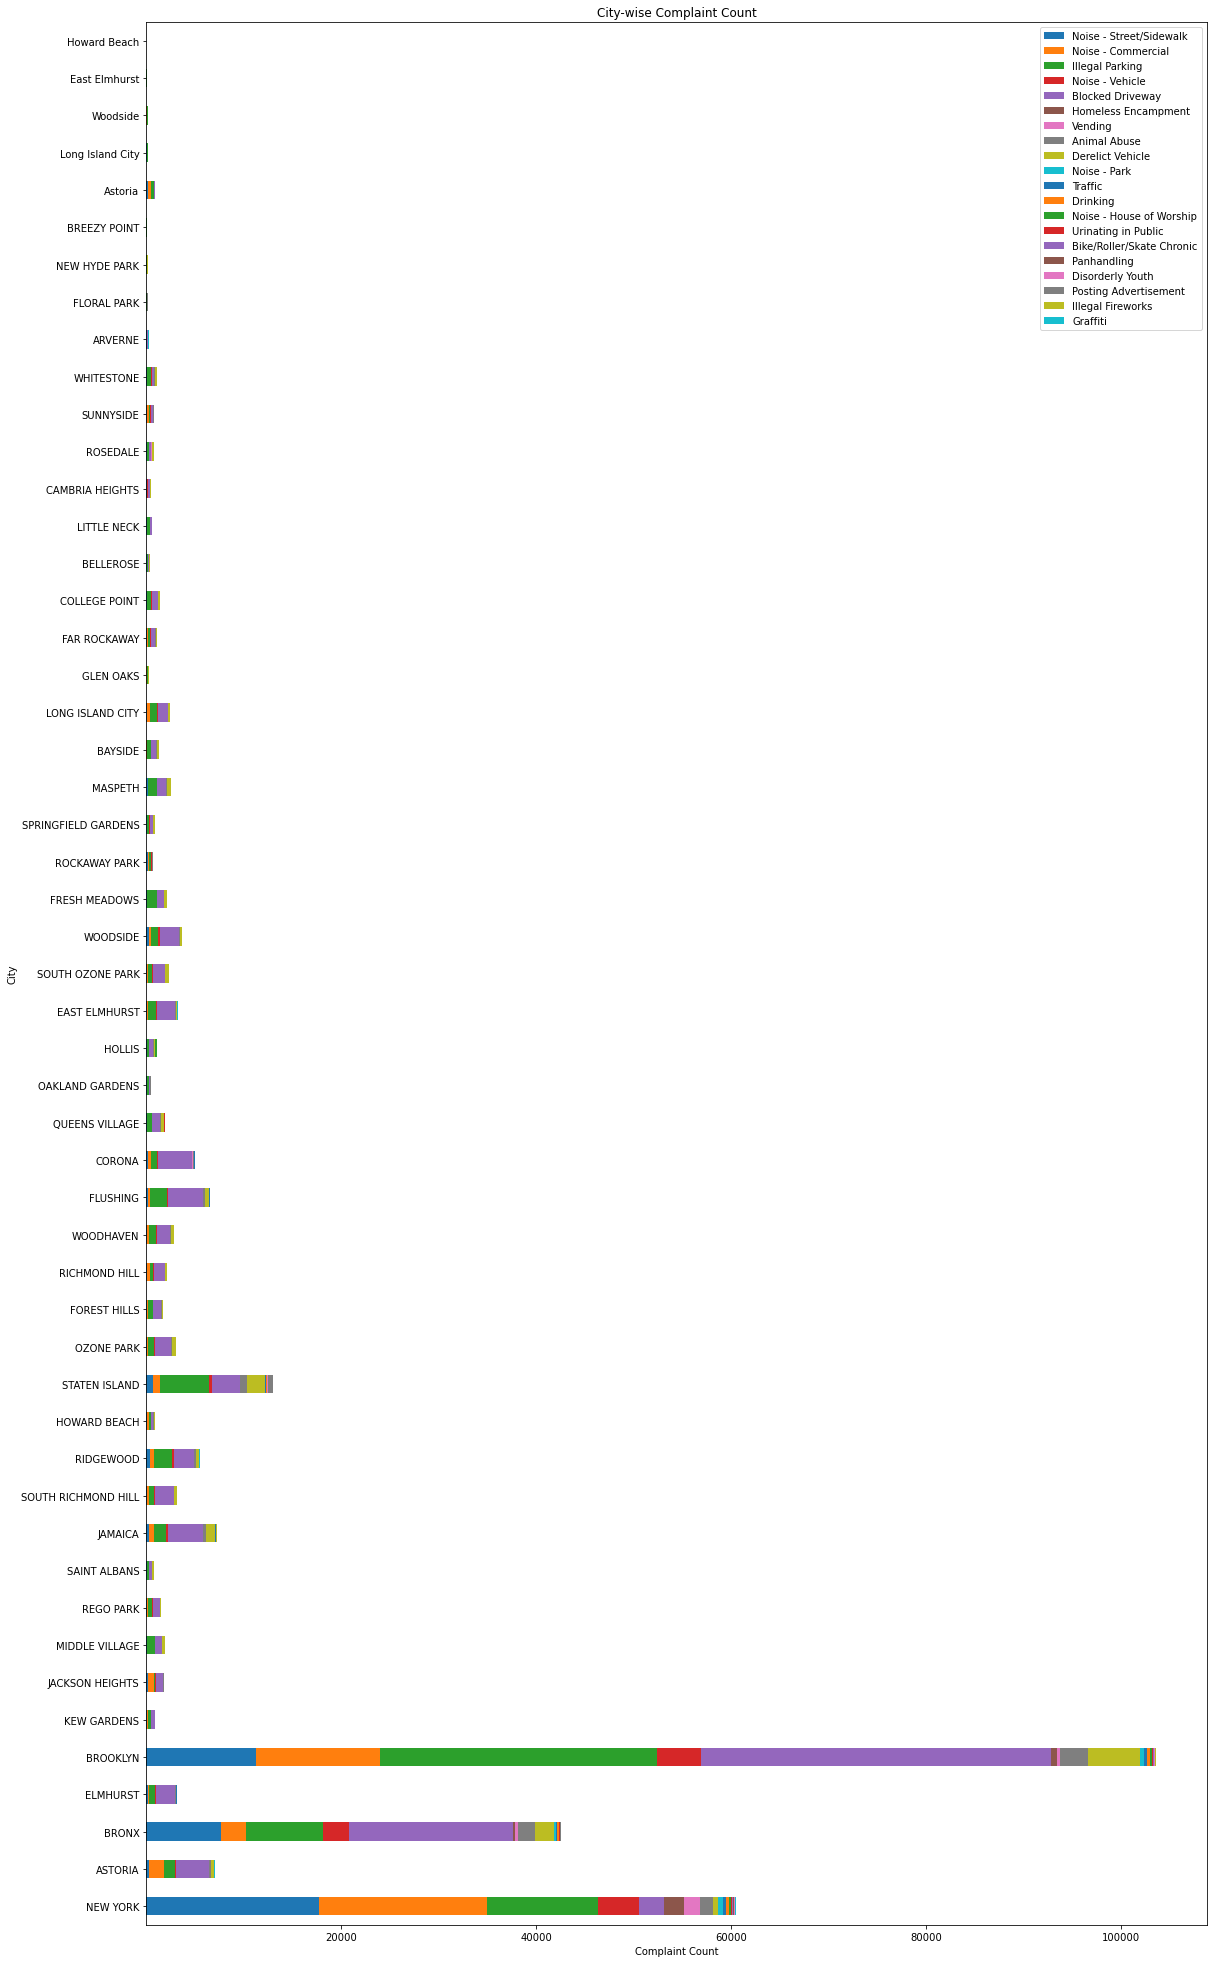

In [68]:
df_new.T.plot(kind= 'barh', stacked= True, figsize= (19, 35), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

# 5. Check if the average response time across various types of complaints

In [73]:
df['Request_Closing_Time'].describe()

count    306173.000000
mean        253.285176
std         343.605095
min           1.016667
25%          77.733333
50%         162.550000
75%         317.166667
max       35232.100000
Name: Request_Closing_Time, dtype: float64